In [1]:
# import library
import pandas as pd
import numpy as np
import re
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
def load_data():
  df = pd.read_excel('datacleanchatgpt_skripsi.xlsx')
  return df

df = load_data()
df.head()

,label,tweet,lower,hapusangka,normalisasi,token,filter,fulltext
0,Positif,-- Halaman obrolan #ChatGPT @OpenAi tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,-- halaman obrolan #chatgpt @openai tidak terc...,"['halaman', 'obrolan', 'chatgpt', 'openai', 't...",halaman obrolan chatgpt openai tercetak firefo...,halaman obrol chatgpt openai cetak firefox sty...
1,Netral,' Snapchat merilis chatbot AI-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,' snapchat merilis chatbot ai-nya sendiri yang...,"['snapchat', 'merilis', 'chatbot', 'ai', 'nya'...",snapchat merilis chatbot ai nya didukung chatg...,snapchat rilis chatbot ai nya dukung chatgpt i...
2,Netral,""" #ChatGPT untuk Guru - Panduan oleh Evan Dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...",""" #chatgpt untuk guru - panduan oleh evan dunn...","['chatgpt', 'untuk', 'guru', 'panduan', 'oleh'...",chatgpt guru panduan evan dunne grup akar rump...,chatgpt guru pandu evan dunne grup akar rumput...
3,Netral,"""#ChatGPT Risiko dan Perlunya #Kebijakan Perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","""#chatgpt risiko dan perlunya #kebijakan perus...","['chatgpt', 'risiko', 'dan', 'perlunya', 'kebi...",chatgpt risiko kebijakan perusahaan orlylobel,chatgpt risiko bijak usaha orlylobel
4,Positif,"""#TripGen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","""#tripgen dapat memberikan layanan loop tertut...","['tripgen', 'dapat', 'memberikan', 'layanan', ...",tripgen layanan loop tertutup wisatawan perjal...,tripgen layan loop tutup wisatawan jalan pepat...


In [3]:
df = pd.DataFrame(df[['label','fulltext']])

In [4]:
df['label'] = df['label'].astype('category')

In [5]:
df['label'].value_counts()

Netral     3932
Negatif    1853
Positif    1316
Name: label, dtype: int64

Text(0.5, 1.0, 'Dataset labels distribution')

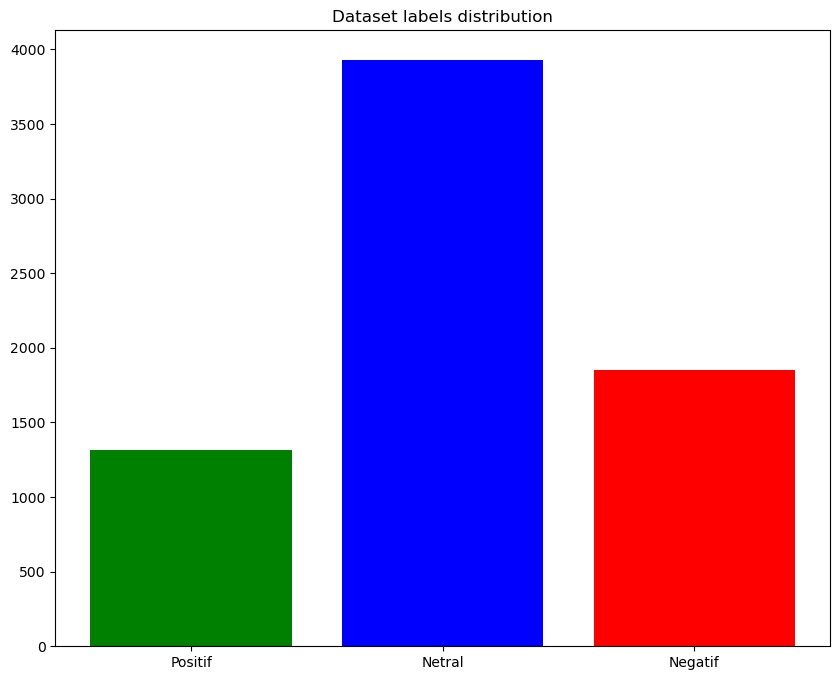

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

label_cnt = Counter(df['label'])
plt.figure(figsize=(10,8))
plt.bar(label_cnt.keys(), label_cnt.values(), color = ["green", "blue", "red"])
plt.title("Dataset labels distribution")

# DATA SAMPLING

In [7]:
X = df.drop(['label'], axis=1)
y = df['label']

In [8]:
X=df
Y=df['label']

Text(0.5, 1.0, 'Over-sampling')

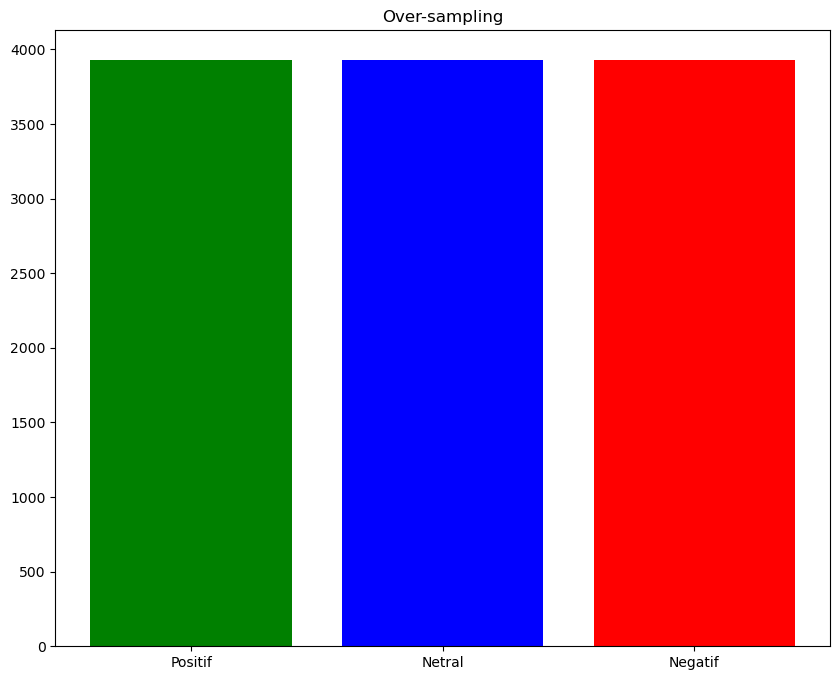

In [9]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, Y)

ros_cnt = Counter(y_res)
plt.figure(figsize=(10,8))
plt.bar(ros_cnt.keys(), ros_cnt.values(), color = ["green", "blue", "red"])
plt.title("Over-sampling")

In [10]:
# Class distribution
y_res.value_counts()

Negatif    3932
Netral     3932
Positif    3932
Name: label, dtype: int64

In [11]:
df = X_res

# PEMBOBOTAN

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['fulltext'].values.astype('U'))
bow_transformer.vocabulary_

{'halaman': 3274,
 'obrol': 6466,
 'chatgpt': 1500,
 'openai': 6572,
 'cetak': 1463,
 'firefox': 2785,
 'stylesheet': 8893,
 'ekstensi': 2435,
 'stylus': 8894,
 'ragu': 7478,
 'kolaborasi': 4619,
 'github': 3103,
 'snapchat': 8646,
 'rilis': 7793,
 'chatbot': 1494,
 'ai': 171,
 'nya': 6438,
 'dukung': 2316,
 'ide': 3563,
 'besar': 954,
 'bicara': 983,
 'teman': 9206,
 'keluarga': 4441,
 'guru': 3234,
 'pandu': 6723,
 'evan': 2642,
 'dunne': 2328,
 'grup': 3204,
 'akar': 236,
 'rumput': 7937,
 'uk': 9761,
 'hitung': 3437,
 'at': 649,
 'school': 8157,
 'compatsch': 1712,
 'didik': 2124,
 'gai': 2940,
 'ajar': 226,
 'risiko': 7810,
 'bijak': 998,
 'usaha': 9866,
 'orlylobel': 6618,
 'tripgen': 9624,
 'layan': 4965,
 'loop': 5198,
 'tutup': 9703,
 'wisatawan': 10249,
 'jalan': 3891,
 'pepatah': 6902,
 'hasil': 3330,
 'sisa': 8557,
 'tripcom': 9623,
 'travel': 9592,
 'pariwisata': 6763,
 'hotel': 3476,
 'traveltech': 9595,
 'dungeon': 2325,
 'manfaat': 5411,
 'cerdas': 1452,
 'buat': 1236,


In [13]:
tokens = bow_transformer.get_feature_names_out()
print(tokens)

['aa' 'aaa' 'aaagh' ... 'zyk' 'zz' 'zzullerr']


In [14]:
text_bow = bow_transformer.transform(df['fulltext'].values.astype('U'))
print(text_bow)

  (0, 1463)	1
  (0, 1500)	1
  (0, 2435)	1
  (0, 2785)	1
  (0, 3103)	1
  (0, 3274)	1
  (0, 4619)	1
  (0, 6466)	1
  (0, 6572)	1
  (0, 7478)	1
  (0, 8893)	1
  (0, 8894)	1
  (1, 171)	2
  (1, 954)	1
  (1, 983)	2
  (1, 1494)	1
  (1, 1500)	1
  (1, 2316)	1
  (1, 3563)	1
  (1, 4441)	1
  (1, 6438)	1
  (1, 7793)	1
  (1, 8646)	1
  (1, 9206)	1
  (2, 171)	1
  :	:
  (11794, 2137)	1
  (11794, 2197)	1
  (11794, 2667)	2
  (11794, 3330)	1
  (11794, 4215)	1
  (11794, 4866)	1
  (11794, 5096)	1
  (11794, 5194)	1
  (11794, 5602)	1
  (11794, 6063)	1
  (11794, 6092)	3
  (11794, 6690)	1
  (11794, 7433)	1
  (11794, 7769)	1
  (11794, 8208)	1
  (11794, 8300)	1
  (11794, 8328)	1
  (11794, 8527)	1
  (11794, 10093)	1
  (11795, 1500)	1
  (11795, 2454)	1
  (11795, 4754)	1
  (11795, 5057)	1
  (11795, 5170)	1
  (11795, 7079)	1


In [15]:
X = text_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(11796, 10509)

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)

print(tweet_tfidf)
print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 8894)	0.3696158266524132
  (0, 8893)	0.3696158266524132
  (0, 7478)	0.28284959788401404
  (0, 6572)	0.16081018848190012
  (0, 6466)	0.21496550524015173
  (0, 4619)	0.31526882059205996
  (0, 3274)	0.24695666679171224
  (0, 3103)	0.29952122060059005
  (0, 2785)	0.3696158266524132
  (0, 2435)	0.2804302365204332
  (0, 1500)	0.04176364866131663
  (0, 1463)	0.3280215478797281
  (1, 9206)	0.2697602635024644
  (1, 8646)	0.282346178912435
  (1, 7793)	0.31213167591255514
  (1, 6438)	0.30547702047167974
  (1, 4441)	0.34091901588575424
  (1, 3563)	0.24449584175164638
  (1, 2316)	0.2450561287452122
  (1, 1500)	0.04723429386248377
  (1, 1494)	0.2193148668684742
  (1, 983)	0.45296675138309095
  (1, 954)	0.30868541376931197
  (1, 171)	0.2644153781528965
  (2, 9761)	0.29662537413770584
  :	:
  (11794, 7769)	0.15933261130122353
  (11794, 7433)	0.1622462687677738
  (11794, 6690)	0.12546592085504019
  (11794, 6092)	0.4637472805898669
  (11794, 6063)	0.15680868640140938
  (11794, 5

# SPLIT DATA

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_res, test_size=0.2, random_state=35)

In [18]:
# Menampilkan jumlah data training dan jumlah data testing
print('x_train: ', len(x_train))
print('x_test: ', len(x_test))
print('y_train: ', len(y_train))
print('y_test: ', len(y_test))

x_train:  9436
x_test:  2360
y_train:  9436
y_test:  2360


# NAIVE BAYES

In [19]:
from sklearn.naive_bayes import MultinomialNB

modelnb = MultinomialNB().fit(x_train,y_train)

In [20]:
prediction = modelnb.predict(x_test)

predict = pd.Series(prediction)

print(predict.to_string())

0       Negatif
1       Positif
2       Positif
3        Netral
4       Negatif
5       Negatif
6       Positif
7       Positif
8       Positif
9        Netral
10      Negatif
11      Negatif
12      Negatif
13      Negatif
14      Positif
15      Positif
16      Negatif
17      Negatif
18      Positif
19      Positif
20      Positif
21      Positif
22       Netral
23       Netral
24      Negatif
25      Negatif
26      Positif
27      Negatif
28       Netral
29      Positif
30      Negatif
31      Positif
32       Netral
33      Negatif
34       Netral
35      Negatif
36       Netral
37      Positif
38      Positif
39      Negatif
40      Positif
41      Positif
42      Positif
43      Negatif
44      Positif
45      Positif
46      Negatif
47      Negatif
48      Negatif
49      Negatif
50      Positif
51      Positif
52      Negatif
53      Negatif
54      Positif
55      Positif
56      Positif
57      Positif
58      Negatif
59      Negatif
60      Positif
61      Positif
62      

In [21]:
true_label = pd.Series(y_test)
print(true_label.to_string())

7454     Negatif
5816      Netral
10403    Positif
3625      Netral
2867     Negatif
2943     Positif
2183     Positif
3356      Netral
4713      Netral
9013     Negatif
6151     Negatif
101       Netral
5214      Netral
2324     Positif
11400    Positif
10586    Positif
7524     Negatif
173      Negatif
9779     Positif
9774     Positif
9487     Positif
5280      Netral
2962      Netral
918       Netral
3749      Netral
2670     Negatif
3231      Netral
7477     Negatif
6987      Netral
6070     Positif
9018     Negatif
11521    Positif
9273     Positif
7834     Negatif
7718     Negatif
8699     Negatif
6821      Netral
5550     Positif
9662     Positif
3664      Netral
6401     Negatif
1494     Positif
11372    Positif
2604     Negatif
7040     Positif
10912    Positif
664       Netral
7895     Negatif
7122     Negatif
8824     Negatif
6185     Positif
11250    Positif
6383     Negatif
2588      Netral
1532     Negatif
927       Netral
11456    Positif
1145      Netral
7378     Negat

# CONFUSION MATRIX

In [22]:
from time import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from pandas import DataFrame

t = time()
y_pred = modelnb.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

scorenb = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % scorenb)

print(metrics.classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif']))

columns = ['Negatif', 'Netral', 'Positif']
cm_nb = confusion_matrix(y_test, y_pred)
df_nb = DataFrame(cm_nb, index=columns, columns=columns)

test time:  0.166s
accuracy:   0.646
              precision    recall  f1-score   support

     Negatif       0.64      0.76      0.70       785
      Netral       0.70      0.34      0.46       790
     Positif       0.63      0.84      0.72       785

    accuracy                           0.65      2360
   macro avg       0.66      0.65      0.62      2360
weighted avg       0.66      0.65      0.62      2360



Text(50.722222222222214, 0.5, 'Label aktual')

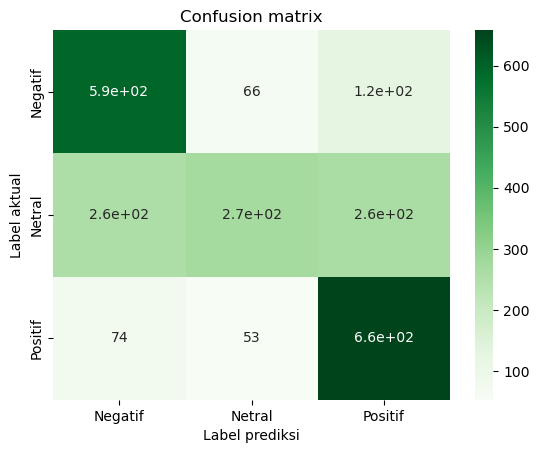

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay

ax = sn.heatmap(df_nb, cmap='Greens', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label aktual')

# CROSS VALIDATION

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelnb, x_train,y_train, cv=10)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 10 folds
print(scores.mean())

[0.62182203 0.61228814 0.62076271 0.62182203 0.6440678  0.61016949
 0.65005302 0.63096501 0.61823966 0.61187699]
0.6242066879953987


# SUPPORT VECTOR MACHINE

In [25]:
# klasifikasi svm
from sklearn.svm import LinearSVC

# model_svm
modelsvm = LinearSVC(max_iter=10000).fit(x_train,y_train)

predsvm = modelsvm.predict(x_test)
predict = pd.Series(predsvm)
print(predict.to_string())

0       Negatif
1       Positif
2       Positif
3        Netral
4        Netral
5       Positif
6       Positif
7        Netral
8       Negatif
9       Negatif
10      Negatif
11      Negatif
12      Positif
13      Positif
14      Positif
15      Positif
16      Negatif
17      Negatif
18      Positif
19      Positif
20      Positif
21      Negatif
22       Netral
23       Netral
24      Negatif
25      Negatif
26      Positif
27      Negatif
28       Netral
29      Positif
30      Negatif
31      Positif
32       Netral
33      Negatif
34       Netral
35      Negatif
36      Negatif
37      Positif
38      Positif
39      Negatif
40      Negatif
41      Positif
42      Positif
43      Negatif
44      Positif
45      Positif
46       Netral
47      Negatif
48      Negatif
49      Negatif
50      Positif
51      Positif
52       Netral
53       Netral
54      Negatif
55      Positif
56      Positif
57      Negatif
58      Negatif
59      Negatif
60      Positif
61      Positif
62      

In [26]:
true_label = pd.Series(y_test)
print(true_label.to_string())

7454     Negatif
5816      Netral
10403    Positif
3625      Netral
2867     Negatif
2943     Positif
2183     Positif
3356      Netral
4713      Netral
9013     Negatif
6151     Negatif
101       Netral
5214      Netral
2324     Positif
11400    Positif
10586    Positif
7524     Negatif
173      Negatif
9779     Positif
9774     Positif
9487     Positif
5280      Netral
2962      Netral
918       Netral
3749      Netral
2670     Negatif
3231      Netral
7477     Negatif
6987      Netral
6070     Positif
9018     Negatif
11521    Positif
9273     Positif
7834     Negatif
7718     Negatif
8699     Negatif
6821      Netral
5550     Positif
9662     Positif
3664      Netral
6401     Negatif
1494     Positif
11372    Positif
2604     Negatif
7040     Positif
10912    Positif
664       Netral
7895     Negatif
7122     Negatif
8824     Negatif
6185     Positif
11250    Positif
6383     Negatif
2588      Netral
1532     Negatif
927       Netral
11456    Positif
1145      Netral
7378     Negat

# CONFUSION MATRIX

In [27]:
from time import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from pandas import DataFrame

t = time()
y_pred = modelsvm.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

scoresvm = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % scoresvm)

print(metrics.classification_report(y_test, y_pred, target_names=['negatif', 'netral', 'positif']))

columns = ['negatif','netral','positif']
cm_svm = confusion_matrix(y_test, y_pred)
df_svm = DataFrame(cm_svm, index=columns, columns=columns)

test time:  0.212s
accuracy:   0.742
              precision    recall  f1-score   support

     negatif       0.74      0.82      0.78       785
      netral       0.73      0.53      0.61       790
     positif       0.76      0.88      0.81       785

    accuracy                           0.74      2360
   macro avg       0.74      0.74      0.73      2360
weighted avg       0.74      0.74      0.73      2360



Text(50.722222222222214, 0.5, 'Label aktual')

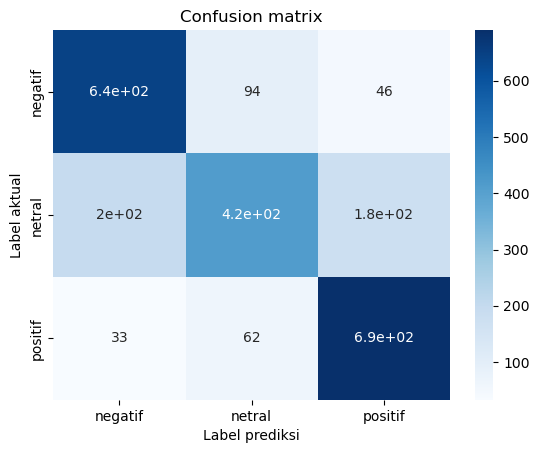

In [28]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay

ax = sn.heatmap(df_svm, cmap='Blues', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label aktual')

# CROSS VALIDATION

In [29]:
from sklearn.model_selection import cross_val_score

scoressvm = cross_val_score(modelsvm, x_train,y_train, cv=10)

# Print the accuracy of each fold:
print(scoressvm)

# Print the mean accuracy of all 10 folds
print(scoressvm.mean())

[0.72033898 0.73199153 0.73622881 0.72563559 0.72033898 0.71610169
 0.75503712 0.74443266 0.72322375 0.71474019]
0.7288069315383647
